**MCMC-Example**<br>
Bimodal distribution<br>
${M} = {p\phi_1 + (1-p)\phi_2}$

In [10]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm

np.random.seed(42)

#%matplotlib inline
#plt.rcParams['figure.figsize'] = (17.0, 4.0)

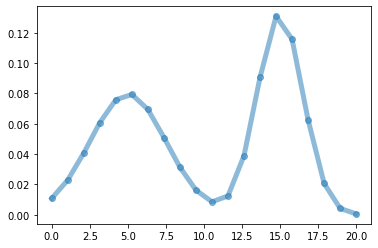

In [11]:
#M = p*phi1 + (1-p)*phi2
p = 0.5
mu1, sigma1 = 5, 2.5
mu2, sigma2 = 15, 1.5


def fdist(x):
    return p*norm.pdf(x, mu1, sigma1) + (1-p)*norm.pdf(x, mu2, sigma2)

X = np.linspace(0, 20, 20)

fig, ax = plt.subplots(1,1)
ax.plot(X, fdist(X), 'o-', lw=5, alpha=0.5, label='')
plt.show()


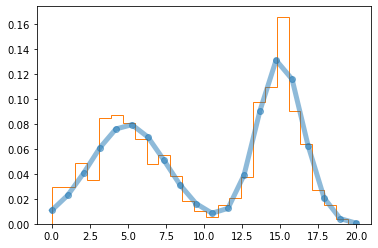

In [12]:
# This Function returns True if the coin with probability P of heads comes heads when flipped.
def random_coin(p):
    unif = random.uniform(0, 1)
    if unif >= p:
        return False
    else:
        return True
    
# This Function runs the MCMC chain for Beta Distribution.
def beta_mcmc(hops):
    states = []
    cur = random.uniform(0, 20)
    for i in range(0, hops):
        states.append(cur)
        next = random.uniform(0, 20)
        ap = min(fdist(next)/fdist(cur), 1) # Calculate the acceptance probability
        if random_coin(ap):
            cur = next
    return states[-1000:] # Returns the last 100 states of the chain

fig, ax = plt.subplots(1,1)
plt.plot(X, fdist(X), 'o-', lw=5, alpha=0.5, label='')
plt.hist(beta_mcmc(1000), density=True, bins=25, histtype='step',label="Simulated_MCMC")
plt.show()
